
<h1 align="center"> <b>Identifying The Most Felicitous Areas For Tourism In Sri Lanka <b> </h1>

---

## **Accomondations Data Analysis & Visualizations**

---

### Import Libraries

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium import Marker
from folium.plugins import MarkerCluster
import math
import io

### Getting know About the Dataset

In [2]:
# upload csv file to google colabaratory

'''
from google.colab import files
uploaded = files.upload()

'''

'\nfrom google.colab import files\nuploaded = files.upload()\n\n'

In [3]:
#read uploaded file as a pandas dataframe
#df = pd.read_csv(io.BytesIO(uploaded['Information for Accommodation.csv']))

df = pd.read_csv('Information for Accommodation.csv')

In [4]:
#display first 5 rows of the dataset

df.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525


In [5]:
df.tail()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
2125,Tourist Hotels,HOTEL NIPPON,"123, KUMARANRATNAM ROAD, COLOMBO 02",49,NaN,Colombo,Colombo,Colombo Divisional Secretariat,79.850099,6.923932
2126,Tourist Hotels,THIDAS ARANA HOTEL,"23RD,MILE POST,BANDIWEWA,POLONNARUWA",11,NaN,Polonnaruwa,Thamankaduwa Pradeshiya Sabha,Thamankaduwa Divisional Secretariat,80.986056,7.951938
2127,Tourist Hotels,THE GRAND MOUNTAIN HOTEL,"73/1,ROHANA DISSANAYAKE MAWATHA,MC ROAD,MATALE.",86,NaN,Matale,Matale,Matale Divisional Secretariat,NaN,NaN
2128,Tourist Hotels,ARIE LAGOON - NEGOMBO,"587,PAMUNUGAMA ROAD,THALAHENA, NEGOMBO",55,NaN,Gampaha,Negombo,Negombo Divisional Secretariat,79.823391,7.168803
2129,Tourist Hotels,THE VILLAS,"352/4,RATHNAYAKA ROAD,THALPITIYA SOUTH,WADDUWA,,",32,NaN,Kalutara,Panadura Pradeshiya Sabha,Panadura Divisional Secretariat,79.923348,6.670724


In [6]:
df.shape

(2130, 10)

In [7]:
for i in df.columns:
  print(i)

Type
Name
Address
Rooms
Grade
District
AGA Division
PS/MC/UC
Logitiute
Latitude


In [8]:
df.isnull().sum()

Type              0
Name              0
Address           0
Rooms             0
Grade           293
District          0
AGA Division     19
PS/MC/UC          3
Logitiute       762
Latitude        760
dtype: int64

In [9]:
df = df.dropna(axis=0, subset=['Grade'])

In [10]:
df.isnull().sum()

Type              0
Name              0
Address           0
Rooms             0
Grade             0
District          0
AGA Division     18
PS/MC/UC          3
Logitiute       741
Latitude        740
dtype: int64

In [11]:
# Checking the datatypes
df.dtypes

Type             object
Name             object
Address          object
Rooms             int64
Grade            object
District         object
AGA Division     object
PS/MC/UC         object
Logitiute       float64
Latitude        float64
dtype: object

## Exploratory Data Analysis & Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


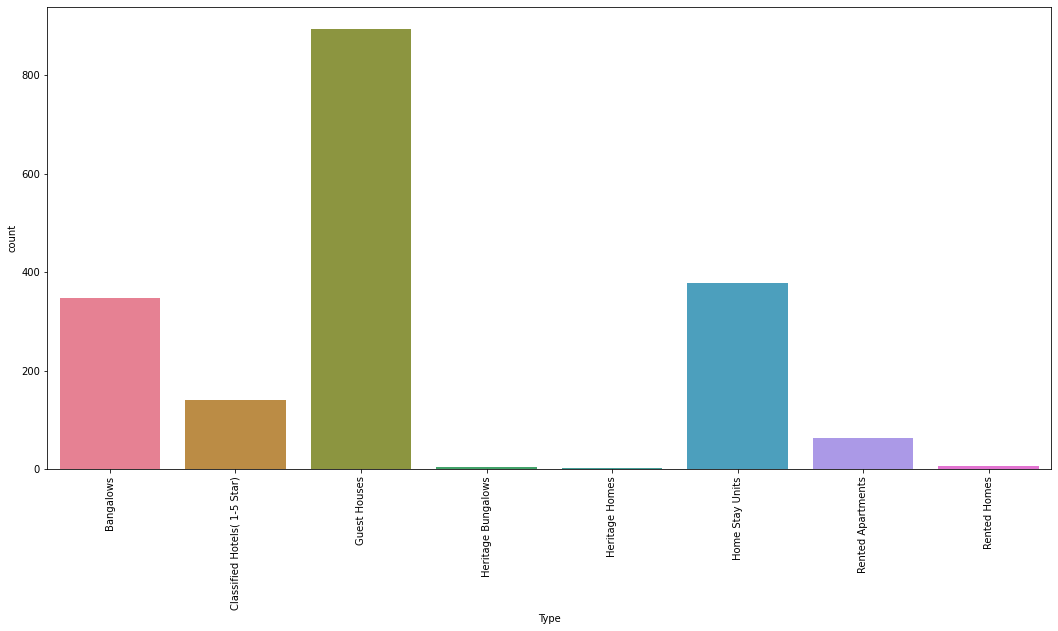

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


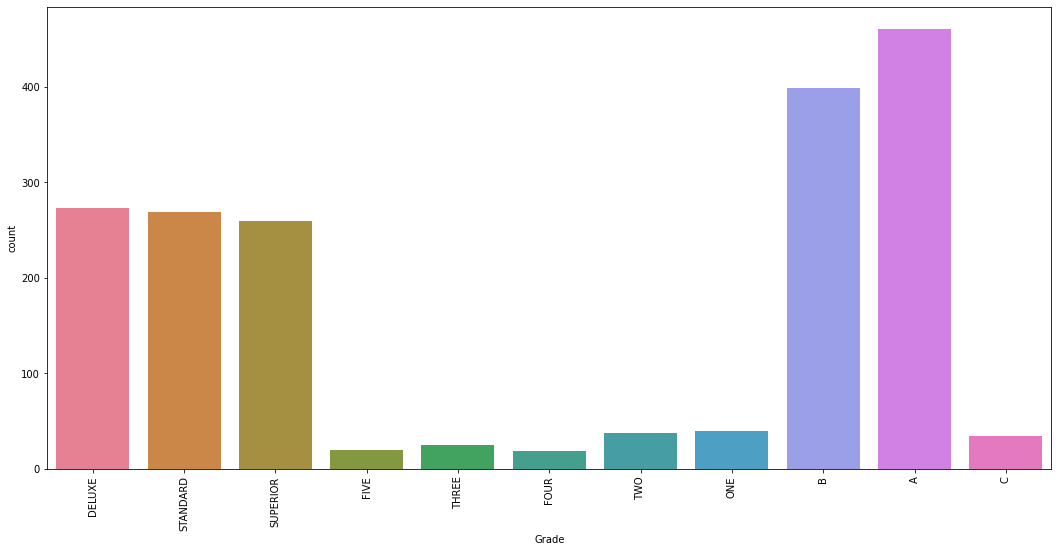

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


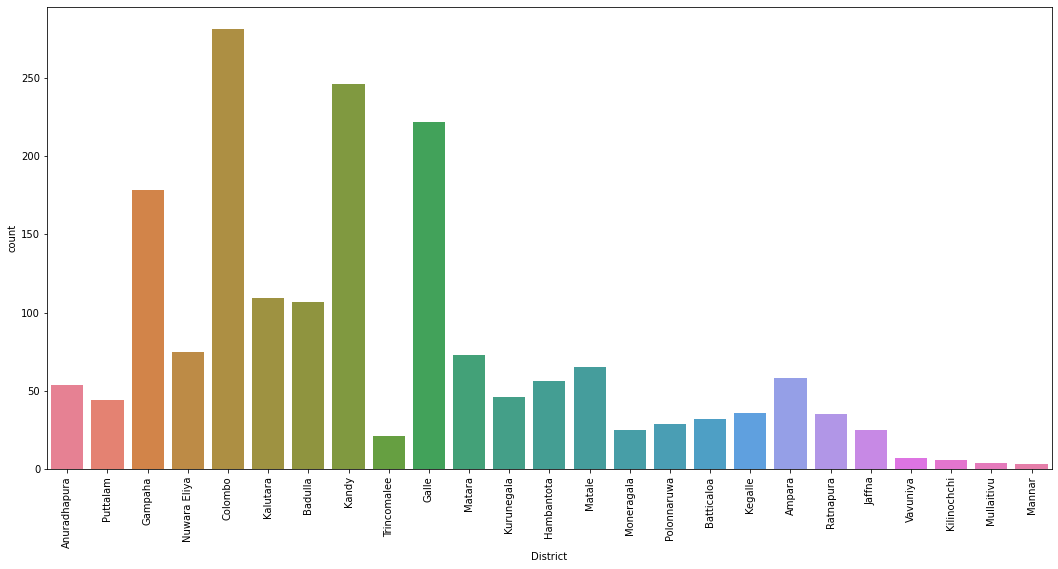

In [12]:
# Display the count os each features avaialble in the dataset

def Countplot(col):

  plt.figure(figsize=(18,8.5))
  sns.countplot(df[str(col)],palette='husl')
  plt.xticks(rotation='vertical',size=10)
  plt.show()

columns = ['Type','Grade','District']

for i in columns:
  Countplot(i)




> ### **According To The Above Visualizations**


*   There Are Huge Number Of Guest Houses Type Of Accomondation places in Sri Lanka
*   Grade A , B Are the most available Grades for accomondation places & Has A Moderate Amount of Delux ,Superior & Standard Types Of Accomondations Areas 
*   Arround Kandy , Colombo & Galle located Most of the Accomondation places respectively ( Colombo is The most )





## Visualize Accomondations Places In A Map





In [13]:
# Remove null values rows in laongitude & lattitude

df_cleaned = pd.DataFrame(df)

df_cleaned.dropna(subset=['Logitiute', 'Latitude'],inplace=True)

In [14]:
df_cleaned.isnull().sum()

Type            0
Name            0
Address         0
Rooms           0
Grade           0
District        0
AGA Division    7
PS/MC/UC        1
Logitiute       0
Latitude        0
dtype: int64

In [15]:
# Create the map
map_1 = folium.Map(location=[7.8731,80.7718], tiles='cartodbpositron', zoom_start=8) 


mc1 = MarkerCluster()

for idx, row in df_cleaned.iterrows(): 

     if not math.isnan(row['Logitiute']) and not math.isnan(row['Latitude']):

   
        mc1.add_child(Marker(location=[row['Latitude'], row['Logitiute']], tooltip=row['Name'],popup=row['Grade']))

#add child to the map                                     
map_1.add_child(mc1)

# Display the map
map_1



> # According To The Above Map Visualizations :


*   There Are Huge Number Of places located in colombo kandy  galle & Anuradhapura areas. reasion this is these places are the most famous areas for tourism Beacuse they are lots ancient places & Tourismly Important Places are located on those areas






## Analyse Places In Colombo Galle & kandy

In [16]:
c_k_g = pd.DataFrame(df[(df['District'] == 'Colombo') | (df['District'] == 'Kandy') | (df['District'] == 'Galle') ])
c_k_g.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
70,Bangalows,THE PIER,"NO 113/8B ,DUWAWATTA, ST PETER'S ROAD, KORALAW...",4,DELUXE,Colombo,Moratuwa,Moratuwa Divisional Secretariat,79.888801,6.773335
75,Bangalows,MOUNT PLEASANT,"78, MISTY HILLS, WALAGEDARA, WATTAPALA, KADUGA...",3,STANDARD,Kandy,Kandy,Udunuwara Divisional Secretariat,NaN,NaN
76,Bangalows,THE RANMIN BUNGALOW,"NO.9, TUDUWA, DAMPE, PILIYANDALA.",3,SUPERIOR,Colombo,Colombo,Colombo Divisional Secretariat,79.918606,6.766099
80,Bangalows,CASA BLANCO,"395/95, HILL CREST GREEN ,BOWALAWATTE, UDA PER...",4,DELUXE,Kandy,Kandy,Kandy Divisional Secretariat,80.618416,7.254844
91,Bangalows,CLUB LESPRI,"322,TRANQUILITY, GALAHA ROAD, NILLAMBA",6,DELUXE,Kandy,Kandy,Kandy Divisional Secretariat,80.639866,7.199854


## Colombo Area

In [17]:
k = pd.DataFrame(df[(df['District'] == 'Kandy')])
k.head()

,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
75,Bangalows,MOUNT PLEASANT,"78, MISTY HILLS, WALAGEDARA, WATTAPALA, KADUGA...",3,STANDARD,Kandy,Kandy,Udunuwara Divisional Secretariat,NaN,NaN
80,Bangalows,CASA BLANCO,"395/95, HILL CREST GREEN ,BOWALAWATTE, UDA PER...",4,DELUXE,Kandy,Kandy,Kandy Divisional Secretariat,80.618416,7.254844
91,Bangalows,CLUB LESPRI,"322,TRANQUILITY, GALAHA ROAD, NILLAMBA",6,DELUXE,Kandy,Kandy,Kandy Divisional Secretariat,80.639866,7.199854
92,Bangalows,BARAMBA,"NO.22,UPAL MAWATHA,PRIMROSE HILL,KANDY",3,DELUXE,Kandy,Kandy,Kandy Divisional Secretariat,NaN,NaN
99,Bangalows,KANDY HOUSE,"NO 95,UPUL MAWATHA, ,5TH LANE,PRIMROSE GARDEN,...",2,DELUXE,Kandy,Kandy,Kandy Divisional Secretariat,80.613952,7.282027


In [18]:
k.shape

(246, 10)

### There are 158 places arround kandy district

### Rooms Count Distribution Around Kandy District

Text(0, 0.5, 'Count')

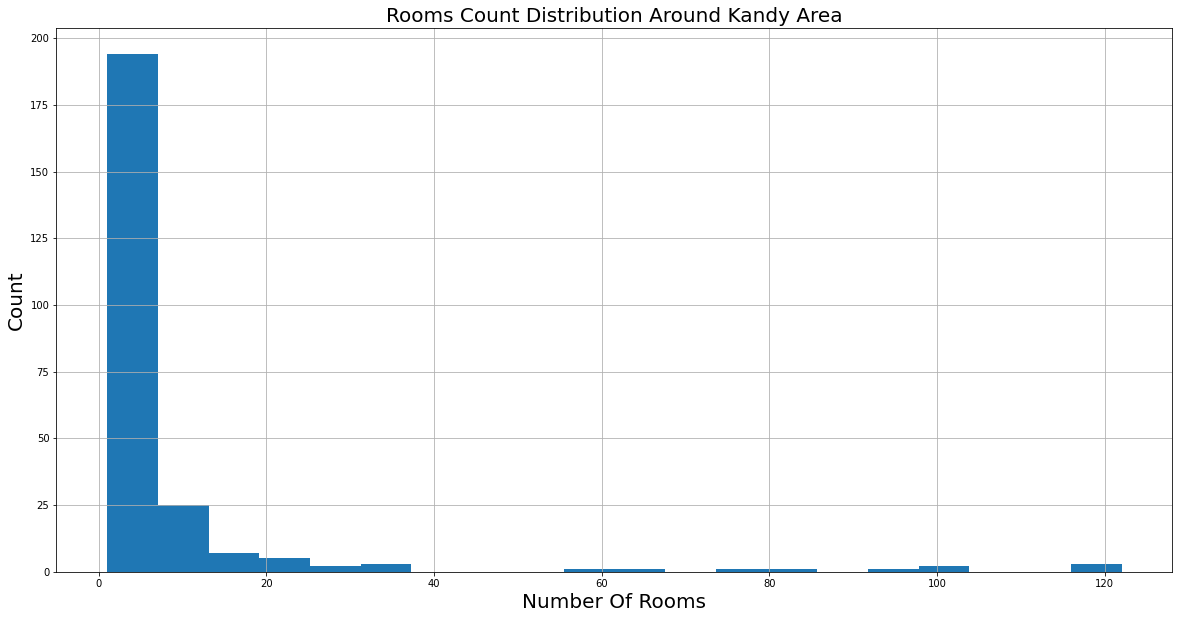

In [19]:
# Rooms Count Distribution Around Colombo Area

fig, ax = plt.subplots(1, 1, figsize = (20,10))
k['Rooms'].hist(bins=20, ax=ax,histtype='bar')
plt.xlabel('Number Of Rooms',fontsize=20)
plt.title('Rooms Count Distribution Around Kandy Area',fontsize=20)
plt.ylabel('Count',fontsize=20)

### Number Of places in Each Condition Type In kandy

SUPERIOR    68
DELUXE      63
STANDARD    40
A           38
B           20
TWO          5
THREE        4
FIVE         3
ONE          3
C            1
FOUR         1
Name: Grade, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


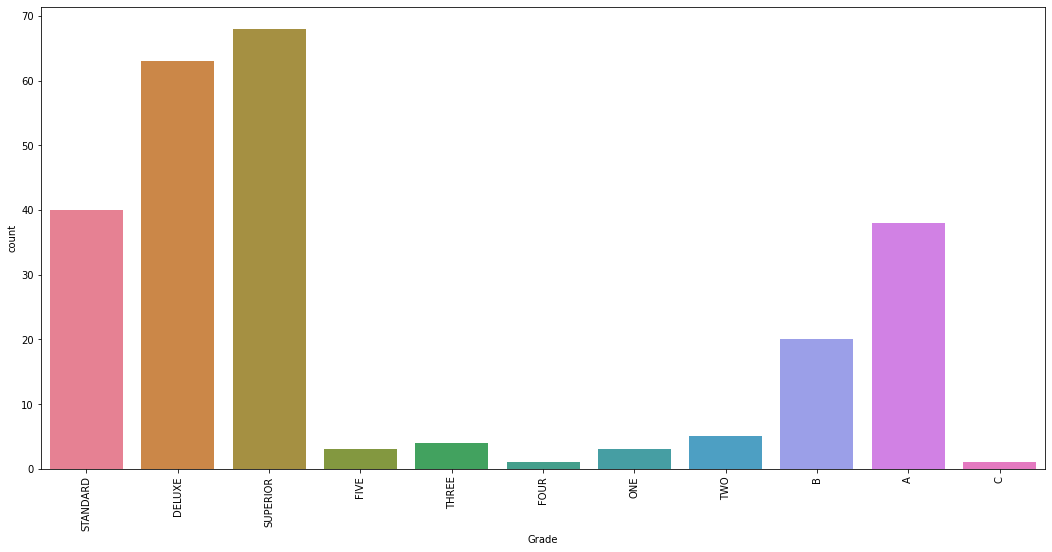

In [20]:
def NCK():

  #print the count
  print(k['Grade'].value_counts()) 

  #visulize the count plot
  plt.figure(figsize=(18,8.5))
  sns.countplot(k['Grade'],palette='husl')
  plt.xticks(rotation='vertical',size=10)
  plt.show()


NCK()

## According To the Graph :

*  most of the places have rooms between 1 & 40 
*  there superior places are the most
* lets Compare this situation against Colombo & Galle

### In Colombo

Text(0, 0.5, 'Count')

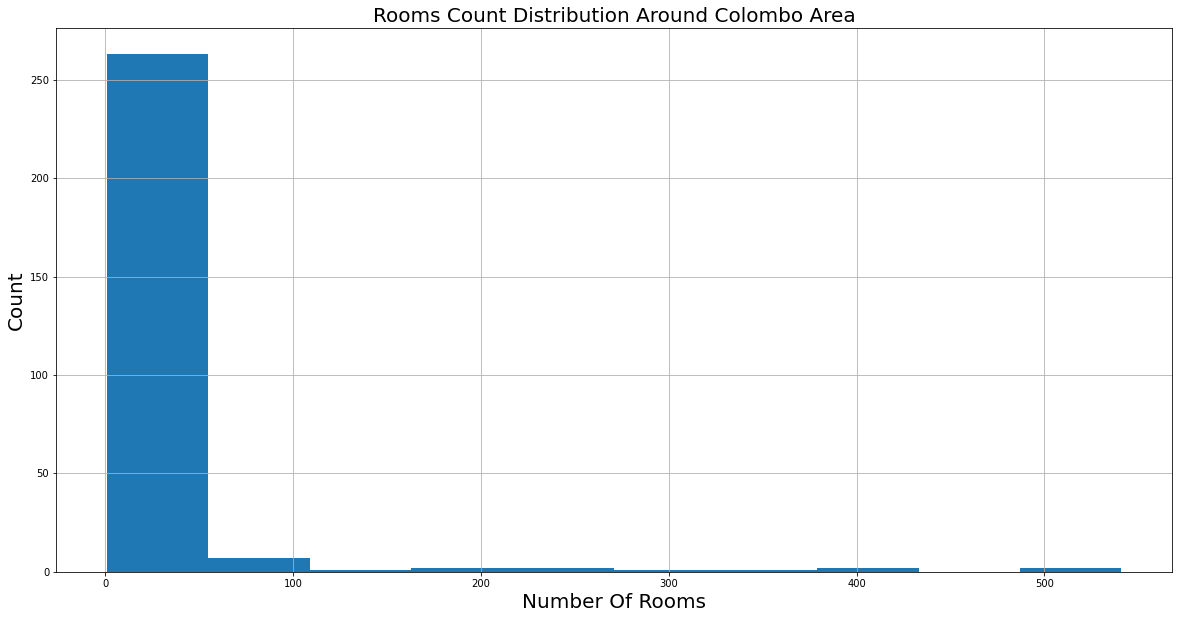

In [21]:
c = pd.DataFrame(df[(df['District'] == 'Colombo')])

fig, ax = plt.subplots(1, 1, figsize = (20,10))
c['Rooms'].hist(bins=10, ax=ax,histtype='bar')
plt.xlabel('Number Of Rooms',fontsize=20)
plt.title('Rooms Count Distribution Around Colombo Area',fontsize=20)
plt.ylabel('Count',fontsize=20)



### Number Of places in Each Condition Type In Colombo

SUPERIOR    62
A           58
DELUXE      53
B           49
STANDARD    26
ONE         10
THREE        9
TWO          5
FIVE         5
C            2
FOUR         2
Name: Grade, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


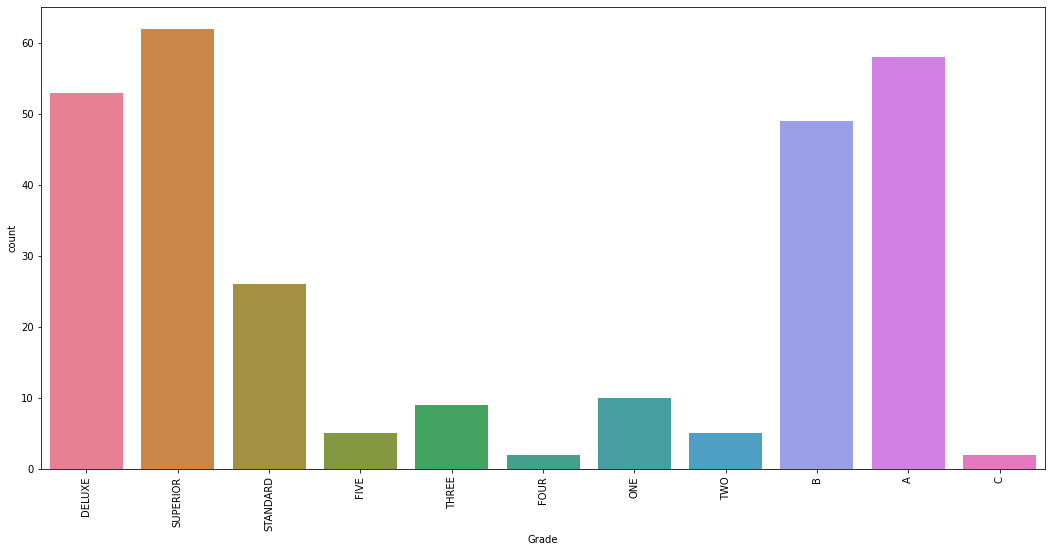

In [22]:
def NCC():

  #print the count
  print(c['Grade'].value_counts()) 

  #visulize the count plot
  plt.figure(figsize=(18,8.5))
  sns.countplot(c['Grade'],palette='husl')
  plt.xticks(rotation='vertical',size=10)
  plt.show()


NCC()

### In Galle

Text(0, 0.5, 'Count')

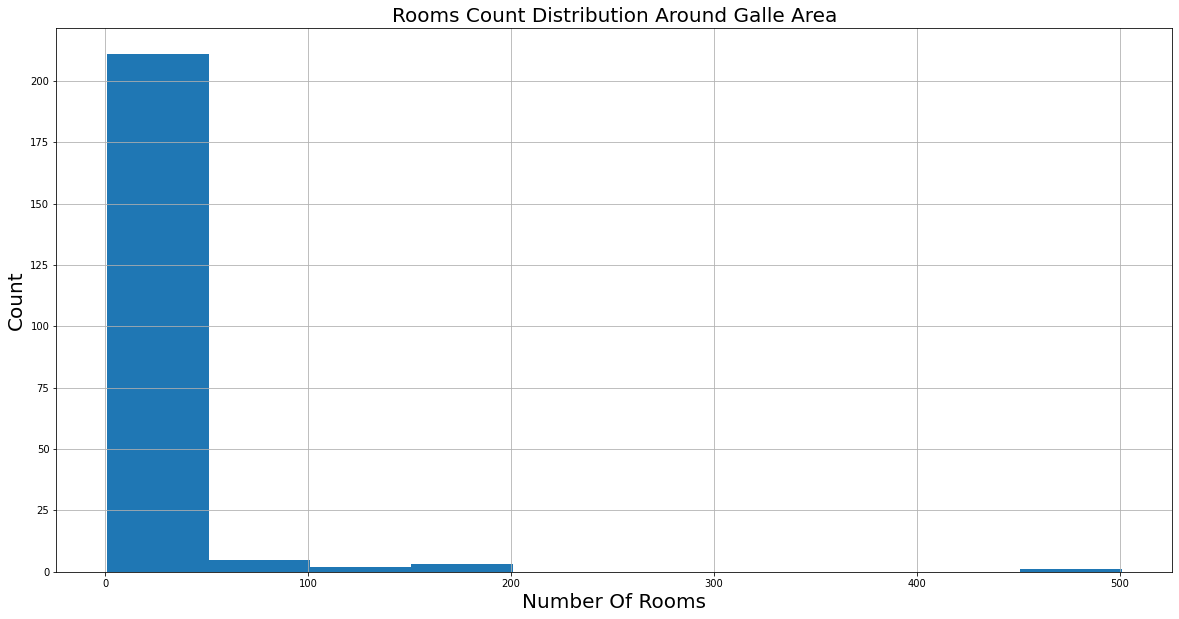

In [23]:
g = pd.DataFrame(df[(df['District'] == 'Galle')])

fig, ax = plt.subplots(1, 1, figsize = (20,10))
g['Rooms'].hist(bins=10, ax=ax,histtype='bar')
plt.xlabel('Number Of Rooms',fontsize=20)
plt.title('Rooms Count Distribution Around Galle Area',fontsize=20)
plt.ylabel('Count',fontsize=20)



### Number Of places in Each Condition Type In Galle

A           69
DELUXE      48
B           39
STANDARD    23
SUPERIOR    23
TWO          8
FIVE         3
ONE          3
C            2
THREE        2
FOUR         2
Name: Grade, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


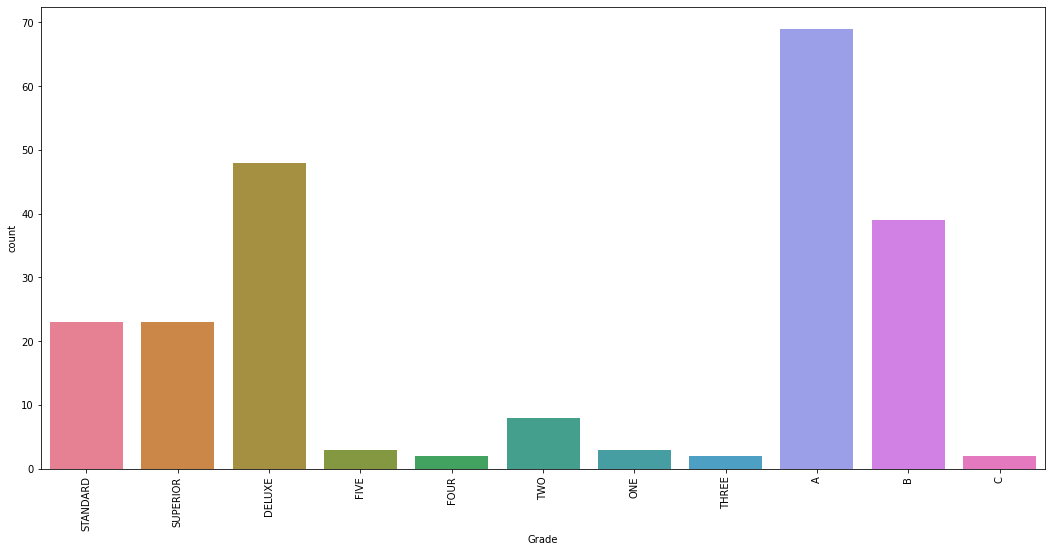

In [24]:
def NCG():

  #print the count
  print(g['Grade'].value_counts()) 

  #visulize the count plot
  plt.figure(figsize=(18,8.5))
  sns.countplot(g['Grade'],palette='husl')
  plt.xticks(rotation='vertical',size=10)
  plt.show()


NCG()

## According to the above graphs 

* colombo & kandy areas has huge places rather than kandy because in kandy & colombo there are massive hotels. its mean five star or above hotels thats the reasions  for this.

* lets check it out by group the places by there Grade

In [25]:
Gr_By_type_grade = pd.DataFrame(c_k_g.groupby(['District', 'Grade']).sum()['Rooms'].reset_index())

# group by each weather condition by using pivot table

Gr_By_type_grade_pivot = pd.DataFrame(Gr_By_type_grade.pivot(index='District', columns='Grade', values='Rooms').reset_index())
Gr_By_type_grade_pivot

Grade,District,A,B,C,DELUXE,FIVE,FOUR,ONE,STANDARD,SUPERIOR,THREE,TWO
0,Colombo,909,451,11,232,1755,380,424,83,188,1676,274
1,Galle,841,343,12,200,817,283,222,72,86,96,394
2,Kandy,424,140,18,250,312,100,87,119,207,366,243


<function matplotlib.pyplot.show>

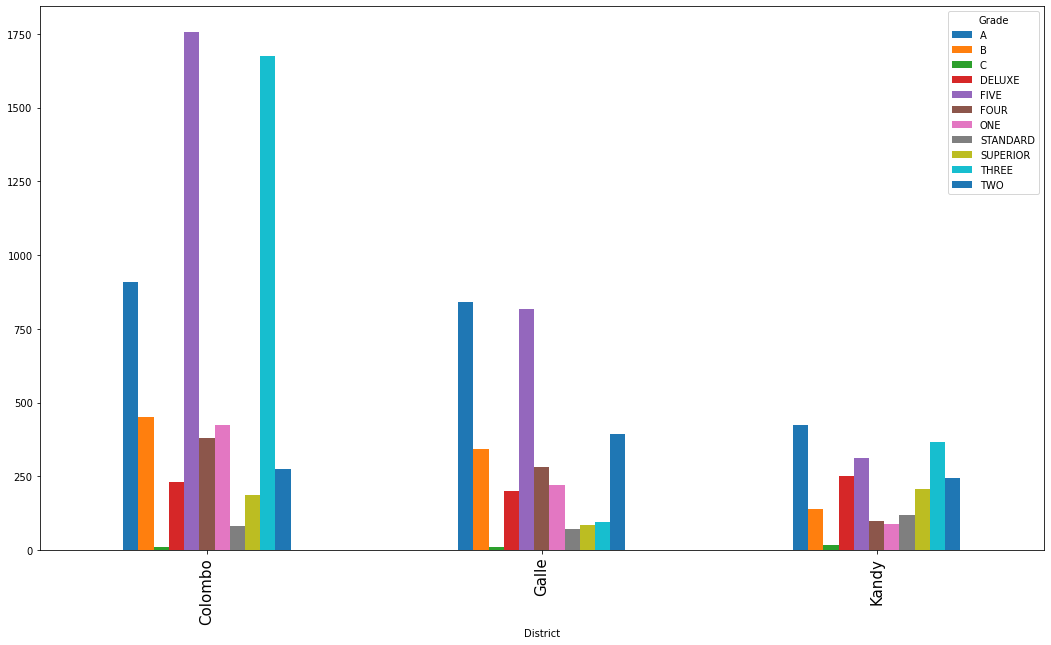

In [26]:
Gr_By_type_grade_pivot.plot(x="District", y=["A", "B", "C","DELUXE","FIVE","FOUR","ONE","STANDARD","SUPERIOR","THREE","TWO" ], kind="bar",figsize=(18,10))
plt.xticks(rotation='vertical',size=15)
plt.show

# **Analyse The Travel Dining-Recreational Activities And Information Of Travel Agents**

---

In [27]:
#import the data
#uploaded2 = files.upload()

In [28]:
#read uploaded file as a pandas dataframe

#df_2 = pd.read_csv(io.BytesIO(uploaded2['Places for Travel-Dining-Recreational activities and Information of travel agents.csv']))

df_2 = pd.read_csv('Places for Travel-Dining-Recreational activities and Information of travel agents.csv')

### Getting Know About The Dataset

In [29]:
df_2.head()

,Type,Name,Address,Grade,District,AGA Division,PS/MC/UC
0,Restaurants,BAVARIAN BARN RESTAURANT,"NO. 11, GALLE FACE COURT 02 COLOMBO",A,Colombo,Colombo,Colombo Divisional Secretariat
1,Restaurants,LORDS RESTAURANT,80B PORUTHOTA ROAD ETTHUKALA NEGOMBO,A,Gampaha,Negombo,Negombo Divisional Secretariat
2,Restaurants,NIHONBASHI RESTAURANT,"NO 11, GALLE FACE TERRACE, COLOMBO 03",A,Colombo,Colombo,Colombo Divisional Secretariat
3,Restaurants,FREE WIND RESTAURANT & BAR,"NO 1285, KANDY ROAD, PALAIYOOTHU, TRINCO MALEE",A,Trincomalee,Uppuveli Trinco Malee,Trincomalee Divisional Secretariat
4,Restaurants,EDWIN RESTAURANT,"204, LEWIS PLACE, NEGOMBO",B,Gampaha,Negombo,Negombo Divisional Secretariat


In [30]:
df_2.tail()

,Type,Name,Address,Grade,District,AGA Division,PS/MC/UC
1518,Water Sports Centers,BORDERLANDS LANKA,NO. 22 BATAKITTA KITULGALA,NaN,Kegalle,Yatiyantota Pradeshiya Sabha,Yatiyanthota Divisional Secretariat
1519,Water Sports Centers,SUNSET ARALIYA WATER SPORTS,"GALLE ROAD , KALUWAMODARA , ALUTHGAMA.",NaN,Kalutara,Aluthgama,Beruwala Divisional Secretariat
1520,Water Sports Centers,SRI LANKA DIVING TOURS,"159/B PORUTOTA ROAD , PALLANGATHURAI KOCHCHIKADE",NaN,Gampaha,Negombo,Negombo Divisional Secretariat
1521,Water Sports Centers,MIRISSA WATERSPORTS (PVT) LTD,"GALLE ROAD,MIRISSA (MIRISSA HARBOUR)",NaN,Matara,Weligama Pradeshiya Sabha,Weligama Divisional Secretariat
1522,Water Sports Centers,AQUA SPORTREIZEN,"NO. 07,COCONAT BOARD ROAD,KALKUDHA,PASSIKUDA",NaN,Batticaloa,Koralai Pattu,Koralai Pattu Divisional Secretariat


In [31]:
df_2.dtypes

Type            object
Name            object
Address         object
Grade           object
District        object
AGA Division    object
PS/MC/UC        object
dtype: object

In [32]:
df_2.isnull().sum()

Type               0
Name               0
Address            0
Grade           1047
District           1
AGA Division       1
PS/MC/UC           1
dtype: int64

In [33]:
df_2.shape

(1523, 7)

#### **Removing null values is not a suitable way to analysis the daya. because there are 1045 values null in Grade column** 

In [34]:
df_2['Grade'].value_counts()

A    384
B     92
Name: Grade, dtype: int64

## Exploratory Data Analysis & Visualization

Travel Agents             852
Restaurants               476
Tourist Shops              74
Spa & Wellness Centers     60
Spice Gardens              36
Water Sports Centers       25
Name: Type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


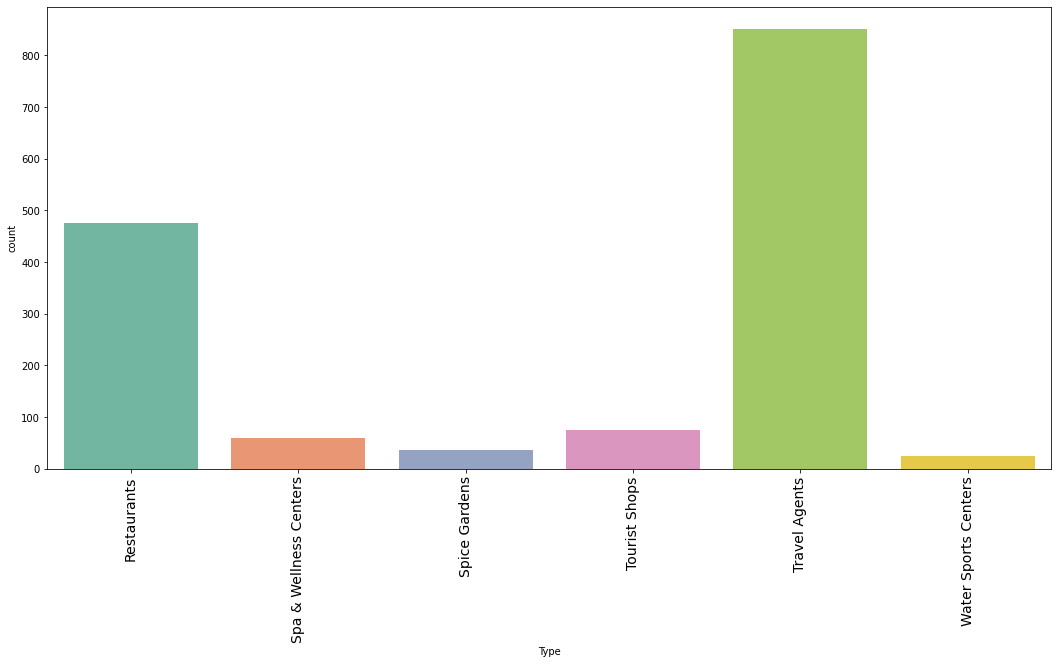

Colombo         939
Gampaha         175
Kandy            70
Galle            64
Matale           45
Kalutara         43
Kegalle          35
Puttalam         29
Kurunegala       25
Ampara           15
Matara           13
Jaffna           11
Batticaloa       11
Ratnapura         8
Trincomalee       7
Anuradhapura      6
Hambantota        6
Nuwara Eliya      5
Polonnaruwa       5
Moneragala        4
Mullaitivu        3
Badulla           2
Kilinochchi       1
Name: District, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


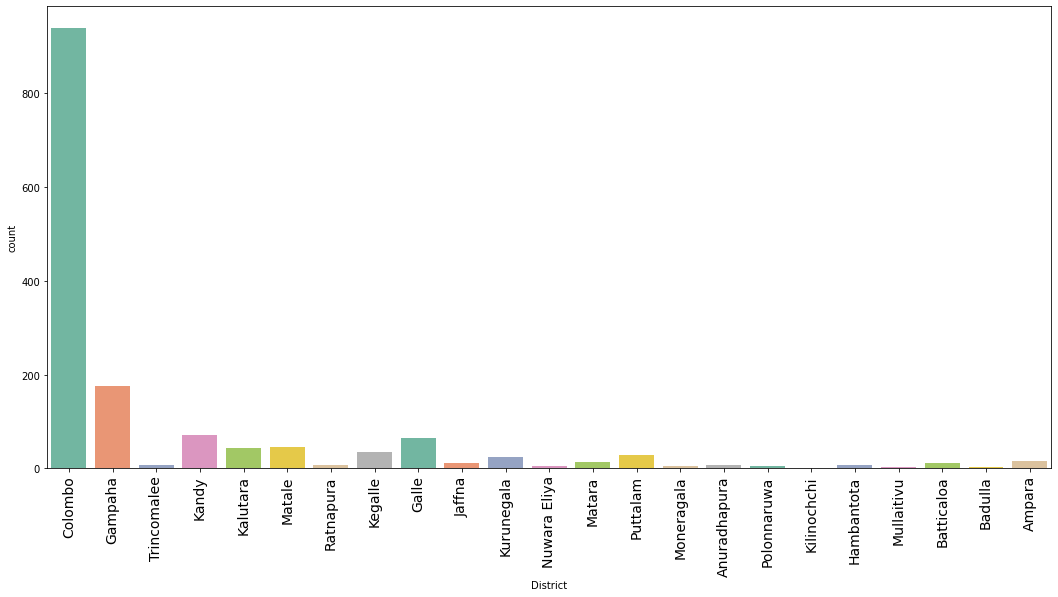

In [35]:
def def_2_countplot(col):

  #print the count
  print(df_2[str(col)].value_counts()) 

  #visulize the count plot
  plt.figure(figsize=(18,8.5))
  sns.countplot(df_2[str(col)],palette='Set2')
  plt.xticks(rotation='vertical',size=14)
  plt.show()

columns_df_2 = ['Type','District']

for i in columns_df_2:
  def_2_countplot(i)

## Visualize How Each Type Distributed In Each Major District

In [36]:
# selct major district with places

df_2_c_k_g_G = pd.DataFrame(df_2[(df_2['District'] == 'Colombo') | (df_2['District'] == 'Kandy') | (df_2['District'] == 'Galle') | (df_2['District'] == 'Gampaha') ])
df_2_c_k_g_G.head()

,Type,Name,Address,Grade,District,AGA Division,PS/MC/UC
0,Restaurants,BAVARIAN BARN RESTAURANT,"NO. 11, GALLE FACE COURT 02 COLOMBO",A,Colombo,Colombo,Colombo Divisional Secretariat
1,Restaurants,LORDS RESTAURANT,80B PORUTHOTA ROAD ETTHUKALA NEGOMBO,A,Gampaha,Negombo,Negombo Divisional Secretariat
2,Restaurants,NIHONBASHI RESTAURANT,"NO 11, GALLE FACE TERRACE, COLOMBO 03",A,Colombo,Colombo,Colombo Divisional Secretariat
4,Restaurants,EDWIN RESTAURANT,"204, LEWIS PLACE, NEGOMBO",B,Gampaha,Negombo,Negombo Divisional Secretariat
5,Restaurants,DAKSHINA RESTAURANT,"154/A, KANDY RD, DALUGAMA,KELANIYA",B,Gampaha,Peliyagoda,Mahara Kelaniya


In [37]:
# group  by each type & district

Df2_Gr_By_type_DIS = pd.DataFrame(df_2_c_k_g_G.groupby(['District', 'Type']).size().reset_index(name='Counts'))

Df2_Gr_By_type_DIS

# group by each type & district using pivot table

Df2_Gr_By_type_DIS_pivot = pd.DataFrame(Df2_Gr_By_type_DIS.pivot(index='District', columns='Type', values='Counts').reset_index())
Df2_Gr_By_type_DIS_pivot

Type,District,Restaurants,Spa & Wellness Centers,Spice Gardens,Tourist Shops,Travel Agents,Water Sports Centers
0,Colombo,255.0,21.0,NaN,22.0,641.0,NaN
1,Galle,37.0,9.0,1.0,3.0,14.0,NaN
2,Gampaha,62.0,4.0,NaN,6.0,102.0,1.0
3,Kandy,24.0,4.0,NaN,28.0,14.0,NaN


<function matplotlib.pyplot.show>

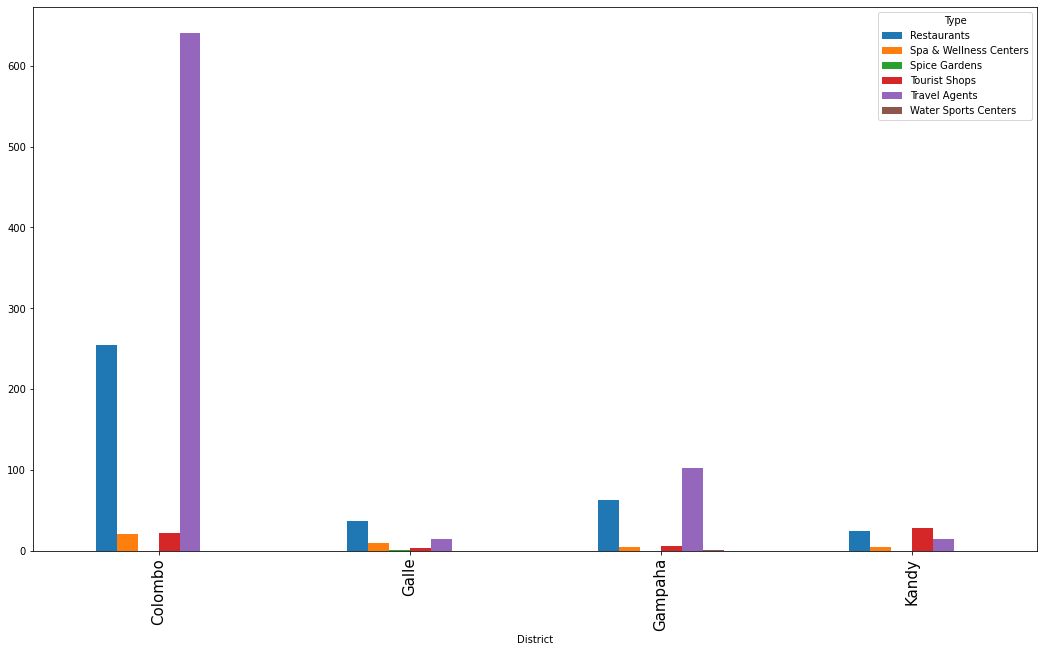

In [38]:
Df2_Gr_By_type_DIS_pivot.plot(x="District", y=["Restaurants", "Spa & Wellness Centers","Spice Gardens","Tourist Shops","Travel Agents","Water Sports Centers" ], kind="bar",figsize=(18,10))
plt.xticks(rotation='vertical',size=15)
plt.show

> ### - There are huge number of resturants & travel agents in colombo districts

> ### - There are most of the ToUrist shops are located in kandy beasue kandy has thire own unique culture so there are lots handmade clohes & items ( bathicks , wood products etc.)

> ### - So according to the above facts we can deermine that Kandy , Colombo , Galle Are the best Places For Torism Considering Theire Availability Of Travel Dining-Recreational Activities And Travel Agents


# **Analysis Of Crimes Data In Sri Lanka**

---

In [39]:
#import the data
#uploaded3 = files.upload()

### Getting Know About The Dataset

In [40]:
#df_3 = pd.read_excel(io.BytesIO(uploaded3['Crime_Data _All.xlsx']))

df_3 = pd.read_excel('Crime_Data _All.xlsx')

In [41]:
df_3.head()

,Year,Category,Anuradhapura,Ampara,Badulla (Badfulla & Bandarawela ),Batticaloa,"Colombo (Colombo South, North, Central) Mt. Laviniya, Nugegoda",Galle (Galle/Elpitiya),Gampaha (Kelaniya/Gampha/Negombo Div),"Jaffna(Jaffna, KKS)","Kalutara (Kalutara,Panadura)","Kandy (Kandy, Gampola)","Kegalle (Kegalle, Sithawakapura0","Kilinochchi (Kilinochchi, Mankulam )","Kurunegala (Kurunegala, Kuliyapitiya, Nikaweratiya )",Mannar,Matale,Matara,Monaragala,Mulllativu,"Nuwara Eliya (Hatton, Nuwara Eliya )",Polonnaruwa,"Puttlam (Puttlam, Chilaw )",Ratnapura,Hambanthota (Tangalle ),"Trincomalee (Kantale, Trincomalee )",Vavuniya
0,2010,Abduction / Kidnapping,51,16,26,21,108,60,96,31,66,54,48,0,65,9,21,66,17,0,13,23,39,45,43,13,8
1,2010,Arson,21,41,18,30,30,36,55,6,33,23,43,0,96,3,17,23,16,0,8,43,38,41,38,8,6
2,2010,Mischief over Rs.5000/=,92,37,27,45,164,65,146,24,54,77,83,2,183,6,25,33,31,0,49,43,58,69,44,36,10
3,2010,H.B. & Theft,720,241,402,237,3649,867,3664,191,1241,856,962,18,1343,33,196,493,258,2,283,375,621,1014,362,227,89
4,2010,Grevious Hurt,135,98,68,39,149,83,143,46,46,117,66,7,77,14,28,27,23,0,53,47,23,100,33,57,16


In [42]:
df_3.tail(1)

,Year,Category,Anuradhapura,Ampara,Badulla (Badfulla & Bandarawela ),Batticaloa,"Colombo (Colombo South, North, Central) Mt. Laviniya, Nugegoda",Galle (Galle/Elpitiya),Gampaha (Kelaniya/Gampha/Negombo Div),"Jaffna(Jaffna, KKS)","Kalutara (Kalutara,Panadura)","Kandy (Kandy, Gampola)","Kegalle (Kegalle, Sithawakapura0","Kilinochchi (Kilinochchi, Mankulam )","Kurunegala (Kurunegala, Kuliyapitiya, Nikaweratiya )",Mannar,Matale,Matara,Monaragala,Mulllativu,"Nuwara Eliya (Hatton, Nuwara Eliya )",Polonnaruwa,"Puttlam (Puttlam, Chilaw )",Ratnapura,Hambanthota (Tangalle ),"Trincomalee (Kantale, Trincomalee )",Vavuniya
65,2012,"Offences under the Poisons, Opium & Dangerous...",7,1,20,3,573,65,75,3,83,6,6,0,10,4,20,11,44,0,2,1,12,20,56,1,5


In [43]:
df_3.dtypes

Year                                                               int64
Category                                                          object
Anuradhapura                                                       int64
Ampara                                                             int64
Badulla (Badfulla & Bandarawela )                                  int64
Batticaloa                                                         int64
Colombo (Colombo South, North, Central) Mt. Laviniya, Nugegoda     int64
Galle (Galle/Elpitiya)                                             int64
Gampaha (Kelaniya/Gampha/Negombo Div)                              int64
Jaffna(Jaffna, KKS)                                                int64
Kalutara (Kalutara,Panadura)                                       int64
Kandy (Kandy, Gampola)                                             int64
Kegalle (Kegalle, Sithawakapura0                                   int64
Kilinochchi (Kilinochchi, Mankulam )               

In [44]:
df_3.describe()

,Year,Anuradhapura,Ampara,Badulla (Badfulla & Bandarawela ),Batticaloa,"Colombo (Colombo South, North, Central) Mt. Laviniya, Nugegoda",Galle (Galle/Elpitiya),Gampaha (Kelaniya/Gampha/Negombo Div),"Jaffna(Jaffna, KKS)","Kalutara (Kalutara,Panadura)","Kandy (Kandy, Gampola)","Kegalle (Kegalle, Sithawakapura0","Kilinochchi (Kilinochchi, Mankulam )","Kurunegala (Kurunegala, Kuliyapitiya, Nikaweratiya )",Mannar,Matale,Matara,Monaragala,Mulllativu,"Nuwara Eliya (Hatton, Nuwara Eliya )",Polonnaruwa,"Puttlam (Puttlam, Chilaw )",Ratnapura,Hambanthota (Tangalle ),"Trincomalee (Kantale, Trincomalee )",Vavuniya
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2011.000000,103.545455,43.772727,53.727273,45.984848,493.106061,118.000000,390.742424,42.666667,148.318182,121.439394,118.287879,15.969697,165.666667,10.348485,40.696970,65.227273,40.621212,3.636364,35.757576,48.772727,76.560606,124.257576,64.227273,33.621212,23.151515
std,0.822753,182.198723,67.184200,90.821642,76.199433,968.217619,194.654566,818.628953,72.476911,295.650269,208.027670,228.273909,30.503452,287.403835,16.963755,58.802399,113.966229,68.396303,8.488248,57.428232,78.088667,132.749287,225.932346,103.629487,58.342692,39.968157
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,4.000000,2.000000,2.000000,2.000000,21.000000,4.000000,11.250000,1.000000,4.000000,5.250000,3.000000,1.000000,7.750000,0.000000,1.000000,6.000000,1.000000,0.000000,1.000000,2.250000,3.250000,3.000000,2.000000,1.000000,1.000000
50%,2011.000000,25.500000,16.000000,18.500000,10.000000,57.500000,36.500000,67.000000,6.500000,38.000000,27.500000,29.000000,3.000000,57.500000,4.000000,17.500000,21.500000,18.500000,1.000000,9.000000,18.000000,23.500000,45.000000,26.000000,10.000000,6.000000
75%,2012.000000,103.250000,45.000000,70.250000,44.000000,314.750000,108.750000,145.250000,45.000000,87.500000,121.500000,75.750000,17.000000,179.750000,11.750000,59.500000,78.000000,42.500000,3.000000,48.750000,47.750000,83.500000,128.000000,55.250000,34.500000,15.000000
max,2012.000000,834.000000,242.000000,402.000000,271.000000,3649.000000,867.000000,3664.000000,324.000000,1287.000000,918.000000,1001.000000,140.000000,1343.000000,69.000000,269.000000,555.000000,334.000000,56.000000,283.000000,375.000000,621.000000,1091.000000,487.000000,227.000000,136.000000


## Type Of Crimes

In [45]:
df_3['Category'].value_counts()

Rape / Incest                                                                                                      3
Riot                                                                                                               3
Extortion                                                                                                          3
Procuration / Trafficking                                                                                          3
Cruelty to Children & sexual  exploitation of children                                                             3
Arson                                                                                                              3
Theft of Property including praedial produce over Rs. 5000/ & cycle cattle theft  irrrespective of their value     3
Cheating/Misappropriation C.B. Trust over Rs.100,000/=                                                             3
Possession of  Automatic or  Repeater Shot Guns                 

## Cleaning The Data

In [46]:
#rename the columns
df_3.columns =  ['year', 'category','Anuradhapura','Ampara', 'Badulla','Batticalo', 'Colombo','Galle','Gampaha', 
                 'Jaffna','Kalutara','Kandy', 'Kegalle','Kilinochchi', 'Kurunegala','Mannar','Matale', 'Matara','Monaragala',
                 'Mulllativu', 'Nuwara Eliya','Polonnaruwa', 'Puttlam','Ratnapura','Hambanthota', 'Trincomalee','Vavuniya']


In [47]:
#check the result
df_3.head(2)

,year,category,Anuradhapura,Ampara,Badulla,Batticalo,Colombo,Galle,Gampaha,Jaffna,Kalutara,Kandy,Kegalle,Kilinochchi,Kurunegala,Mannar,Matale,Matara,Monaragala,Mulllativu,Nuwara Eliya,Polonnaruwa,Puttlam,Ratnapura,Hambanthota,Trincomalee,Vavuniya
0,2010,Abduction / Kidnapping,51,16,26,21,108,60,96,31,66,54,48,0,65,9,21,66,17,0,13,23,39,45,43,13,8
1,2010,Arson,21,41,18,30,30,36,55,6,33,23,43,0,96,3,17,23,16,0,8,43,38,41,38,8,6


## Filter Type Of crimes That Mainly Affect To Tourists

In [48]:
im_cr = pd.DataFrame(df_3[(df_3['category'] == 'Riot') | (df_3['category'] == 'Counterfeiting Currency') | (df_3['category'] == 'Extortion') | (df_3['category'] == 'Robbery') ])
im_cr  

,year,category,Anuradhapura,Ampara,Badulla,Batticalo,Colombo,Galle,Gampaha,Jaffna,Kalutara,Kandy,Kegalle,Kilinochchi,Kurunegala,Mannar,Matale,Matara,Monaragala,Mulllativu,Nuwara Eliya,Polonnaruwa,Puttlam,Ratnapura,Hambanthota,Trincomalee,Vavuniya
9,2010,Riot,2,0,6,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0
10,2010,Robbery,239,45,79,69,1436,490,1345,93,388,182,305,28,453,14,66,151,80,2,52,93,167,350,216,33,64
12,2010,Extortion,1,0,0,5,21,1,17,2,0,5,1,6,17,0,0,0,1,0,4,2,4,2,1,1,3
15,2010,Counterfeiting Currency,3,0,0,1,12,2,5,1,0,1,0,0,2,0,0,2,0,0,0,0,0,1,0,1,0
31,2011,Riot,0,3,3,4,12,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,2,0
32,2011,Robbery,215,45,67,75,1613,420,1330,83,381,196,268,40,348,9,61,137,63,10,51,91,177,302,184,27,38
34,2011,Extortion,0,3,0,2,45,6,27,1,3,6,2,3,11,1,1,1,1,0,0,5,2,3,2,3,1
37,2011,Counterfeiting Currency,4,2,2,0,8,4,5,2,1,1,0,0,6,0,0,0,0,0,1,1,0,1,1,1,0
53,2012,Riot,4,1,3,0,3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
54,2012,Robbery,242,66,128,89,1542,481,1413,91,390,285,279,27,297,10,85,196,78,10,48,96,149,295,181,35,32


## Get Sum Of The Each Crime All Of The Distrcits

In [49]:
column_list = ['Anuradhapura','Ampara', 'Badulla','Batticalo', 'Colombo','Galle','Gampaha', 
              'Jaffna','Kalutara','Kandy', 'Kegalle','Kilinochchi', 'Kurunegala','Mannar','Matale', 'Matara','Monaragala',
               'Mulllativu', 'Nuwara Eliya','Polonnaruwa', 'Puttlam','Ratnapura','Hambanthota', 'Trincomalee','Vavuniya']

im_cr["Crime_sum"] = im_cr[column_list].sum(axis=1)


In [50]:
im_cr

,year,category,Anuradhapura,Ampara,Badulla,Batticalo,Colombo,Galle,Gampaha,Jaffna,Kalutara,Kandy,Kegalle,Kilinochchi,Kurunegala,Mannar,Matale,Matara,Monaragala,Mulllativu,Nuwara Eliya,Polonnaruwa,Puttlam,Ratnapura,Hambanthota,Trincomalee,Vavuniya,Crime_sum
9,2010,Riot,2,0,6,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,8,0,0,0,0,0,0,20
10,2010,Robbery,239,45,79,69,1436,490,1345,93,388,182,305,28,453,14,66,151,80,2,52,93,167,350,216,33,64,6440
12,2010,Extortion,1,0,0,5,21,1,17,2,0,5,1,6,17,0,0,0,1,0,4,2,4,2,1,1,3,94
15,2010,Counterfeiting Currency,3,0,0,1,12,2,5,1,0,1,0,0,2,0,0,2,0,0,0,0,0,1,0,1,0,31
31,2011,Riot,0,3,3,4,12,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,2,0,27
32,2011,Robbery,215,45,67,75,1613,420,1330,83,381,196,268,40,348,9,61,137,63,10,51,91,177,302,184,27,38,6231
34,2011,Extortion,0,3,0,2,45,6,27,1,3,6,2,3,11,1,1,1,1,0,0,5,2,3,2,3,1,129
37,2011,Counterfeiting Currency,4,2,2,0,8,4,5,2,1,1,0,0,6,0,0,0,0,0,1,1,0,1,1,1,0,40
53,2012,Riot,4,1,3,0,3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,15
54,2012,Robbery,242,66,128,89,1542,481,1413,91,390,285,279,27,297,10,85,196,78,10,48,96,149,295,181,35,32,6545


In [51]:
TR_im_cr = pd.DataFrame(im_cr.pivot(index='year', columns='category', values='Crime_sum').reset_index())
TR_im_cr

category,year,Counterfeiting Currency,Extortion,Riot,Robbery
0,2010,31,94,20,6440
1,2011,40,129,27,6231
2,2012,45,131,15,6545


<function matplotlib.pyplot.show>

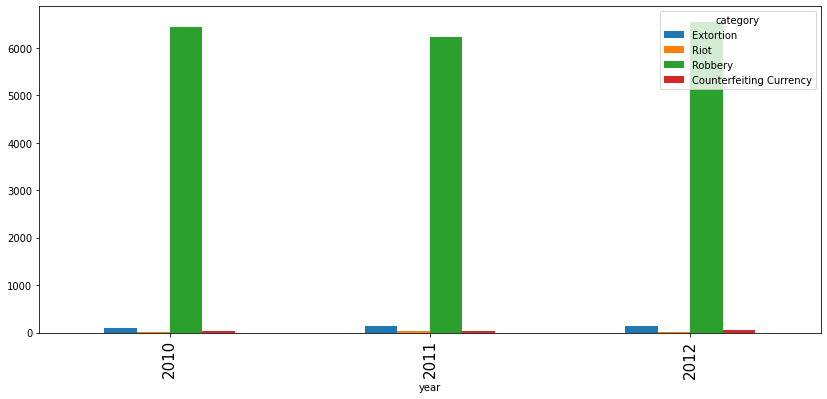

In [52]:
TR_im_cr.plot(x="year", y=["Extortion", "Riot", "Robbery","Counterfeiting Currency"], kind="bar",figsize=(14,6))
plt.xticks(rotation='vertical',size=15)
plt.show

## **According To The Above Insights**
> ### - Robberies Are Higher In All The Years
> ### - Riots Are Lower In All The Years
> ### - Extortion & Counterfeiting Currency Has Moderate Amount During The Years When Compare To The Other

## **How Crimes Distributed In Each Major Cities That Has Higher Tourist Activities, Tourist Shops , Guides & Accomondations ( In 2012 )**

In [53]:
#Filter major cities
im_cr_yr = pd.DataFrame(im_cr[(im_cr['year'] == 2012)])
im_cr_Ds =  im_cr_yr[['category','Colombo','Galle','Gampaha','Kandy']]

#tranform the datset
im_cr_Ds_ts = im_cr_Ds.transpose().reset_index()
im_cr_Ds_ts

# Rename the columns names
im_cr_Ds_ts.columns = ['category', 'Riot',	'Robbery' ,	'Extortion'	, 'Counterfeiting Currency']

# drop wrong rows 
im_cr_Ds_ts.drop(0,inplace=True)

# check the above results
im_cr_Ds_ts

,category,Riot,Robbery,Extortion,Counterfeiting Currency
1,Colombo,3,1542,37,4
2,Galle,0,481,4,3
3,Gampaha,0,1413,33,9
4,Kandy,1,285,7,6


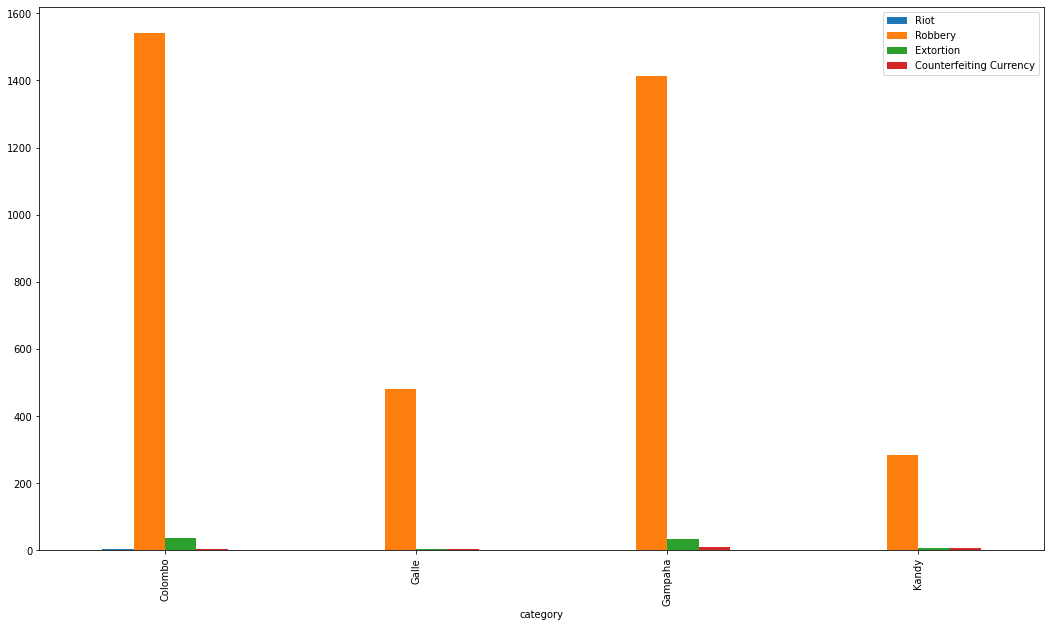

In [54]:
im_cr_Ds_ts.plot(x="category", y=["Riot" , "Robbery" , "Extortion" , "Counterfeiting Currency"], kind="bar",figsize=(18,10))

## **According To Above Insights**
> ### - Colombo Gampaha Has a Higher Crimes Than Other Districts Respectively.
> ### - Overaly Kandy & Galle Has  Has Lower Crimes.
> ### - Extortion	Counterfeiting Currency are most common crime against in Tourists. 

---

# **Conclusion**

## When Considering :
> ## Accomondations Data Analysis & Visualizations
* Grade A , B Are the most available Grades for accomondation places. 
* Has A Moderate Amount of Delux ,Superior & Standard Types Of Grades
* Arround Colombo , kandy & Galle located Most of the Accomondation places respectively ( Colombo is The most ).
* Galle & Colombo Has Every Type Of Accommondation Places With higher Grade

> ## Travel Dining-Recreational Activities And Information Of Travel Agents Data Analyse & visualization
* There are huge number of resturants & travel agents in colombo  & Gampaha districts
* There are most of the Tourist shops are located in kandy beasue kandy has thire own unique culture so there are lots handmade clohes & items ( bathicks , wood products etc.).
* So according to the above facts we can deermine that Colombo , Kandy , Galle Are the best Places For Torism Considering Theire Availability Of Travel Dining-Recreational Activities And Travel Agents Respectively
* Colombo & Gampaha Has The Highest Resturants & Travel Agents Respectively So In Colombo & Gampaha Foriegns Tourists Can Get Good Grade Resturants Easily & Can Hired A Travel Agents Easily.

> ## Crimes Data Analysis & Visualization
* Colombo Gampaha Has a Higher Crimes Than Other Districts Respectively.
* Overaly Kandy & Galle Has Has Lower Crimes.
* Extortion Counterfeiting Currency are most common crime against in Tourists

## So As a Result Of That We Can Reccommend **Galle** As The **Best** & **Safe** Place To Visit For The Tourists
